<h1 style="color:#daae1f;font-size: 60px;font-weight:bolder"> <center> Nutriscore </center></h1>

<h2 style="color:#daae1f;font-size: 30px;font-weight:bolder">Exploration </h2>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn import decomposition, preprocessing
from functions import *
%matplotlib inline


In [2]:
df = pd.read_csv('data/nutriscore_french.csv', sep='\t', low_memory=False)

In [3]:
df.shape

(338051, 21)

<h3 style="color:#daae1f;font-size: 20px;font-weight:bold">  <center> Analyse en composante principale (ACP) </center> <h3>

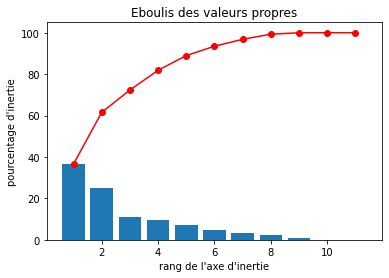

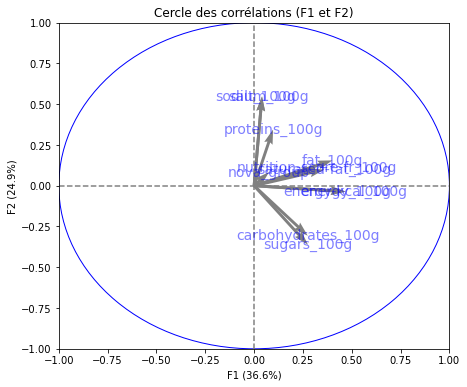

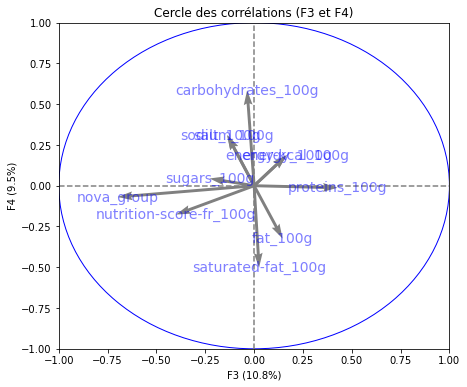

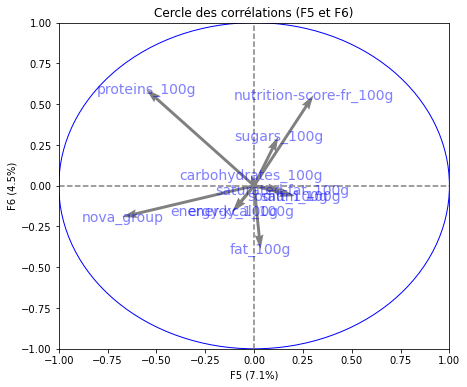

In [4]:
n_comp = 6

df_float = df.select_dtypes(include=['float'])

X = df_float.values
names = df["product_name"] 
features = df_float.columns

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# Calcul des composantes principales
pca = decomposition.PCA()
pca.fit(X_scaled)

# Eboulis des valeurs propres
display_scree_plot(pca)

# Cercle des corrélations
pcs = pca.components_
display_circles(pcs, n_comp, pca, [(0,1),(2,3),(4,5)], labels = np.array(features))

In [5]:
df_float.shape

(338051, 11)

In [95]:
df_float.columns

Index(['nova_group', 'energy-kcal_100g', 'energy_100g', 'fat_100g',
       'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g',
       'proteins_100g', 'salt_100g', 'sodium_100g', 'nutrition-score-fr_100g'],
      dtype='object')

In [6]:
pca.transform(X_scaled)

array([[ 8.78681614e-01,  3.23115023e-02, -4.82767053e-01, ...,
        -5.53583397e-02,  6.29068686e-04, -2.26421772e-05],
       [-2.25918336e+00,  4.46611002e-01, -1.18957246e+00, ...,
        -6.75461120e-02,  3.71241879e-04, -6.15818857e-06],
       [-3.12096918e+00, -9.08276053e-01, -5.58883325e-01, ...,
         3.95514373e-02,  8.34416627e-05,  1.06876941e-05],
       ...,
       [-1.31731608e+00, -1.61222269e+00, -7.75271270e-01, ...,
         1.87934725e-02,  7.54535530e-04,  1.05846877e-05],
       [ 2.06100454e+00, -7.43556739e-01, -3.90363895e-01, ...,
         6.57983002e-02, -9.27806890e-04,  9.11279291e-06],
       [ 1.03018733e+00,  5.02731972e-01, -5.73476855e-01, ...,
        -9.16341567e-02,  5.61323544e-05, -6.77355579e-06]])

In [7]:
pca_test = decomposition.PCA(0.80)
pca_test.fit(X_scaled)

PCA(n_components=0.8)

In [8]:
pca_test.explained_variance_

array([4.03048284, 2.74072967, 1.18495749, 1.04932279])

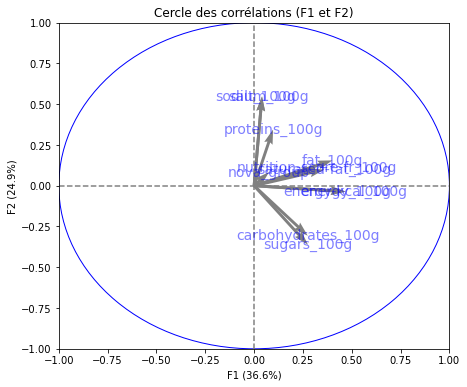

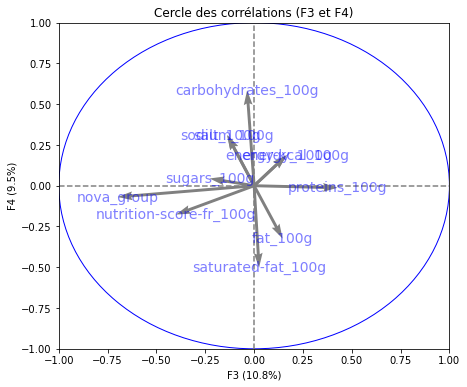

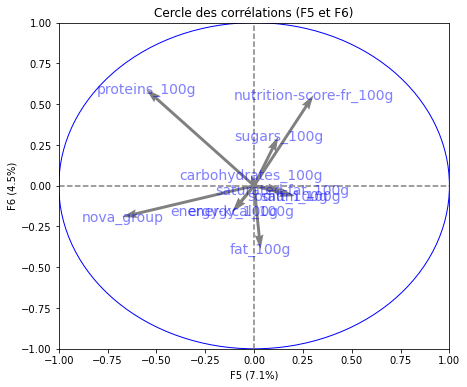

In [9]:
pca_four_cpt = decomposition.PCA(n_components=6)
pca_four_cpt.fit(X_scaled)

# Cercle des corrélations
pcs = pca_four_cpt.components_
display_circles(pcs, 6, pca, [(0,1),(2,3),(4,5)], labels = np.array(features))

In [19]:
x_project = pca_four_cpt.transform(X_scaled)
nutri = pd.DataFrame(data=x_project, index=df.index)
nutri['nutriscore'] = df['nutriscore_grade']
nutri

0         1         2         3         4         5 nutriscore
0       0.878682  0.032312 -0.482767  2.071849  0.036199 -0.016812          d
1      -2.259183  0.446611 -1.189572 -0.016881  0.673828 -0.152045          d
2      -3.120969 -0.908276 -0.558883 -0.449814 -0.040439 -0.681930          b
3      -1.376640 -1.247308 -0.737508 -0.710938  0.023177  0.335167          d
4      -0.853425 -0.144421 -0.039682  0.473272 -0.649769  0.518259          d
...          ...       ...       ...       ...       ...       ...        ...
338046 -1.361526 -1.319098 -0.647886 -1.225505  0.086582 -0.018120          d
338047 -1.270958 -1.594214 -0.548877 -0.795908 -0.062308 -0.067546          c
338048 -1.317316 -1.612223 -0.775271 -0.950207  0.111349  0.123261          d
338049  2.061005 -0.743557 -0.390364 -2.296349  0.400071  0.051725          d
338050  1.030187  0.502732 -0.573477 -0.025764  0.353003 -0.006088          d

[338051 rows x 7 columns]

<p style="color:#daae1f;font-size: 16px"> Changement de type pour la colonne "nutriscore_grade" en catégorie car c'est une variable catégoriale .<br> Puis remplacement des données manquantes de la colonne avec la fonction mode qui va remplir selon la tendance la plus forte  </p>

In [11]:
df['nutriscore_grade'].isna().sum()
df['nutriscore_grade'] = df['nutriscore_grade'].astype('category')
df['nutriscore_grade'] = df['nutriscore_grade'].fillna(df['nutriscore_grade'].mode()[0])

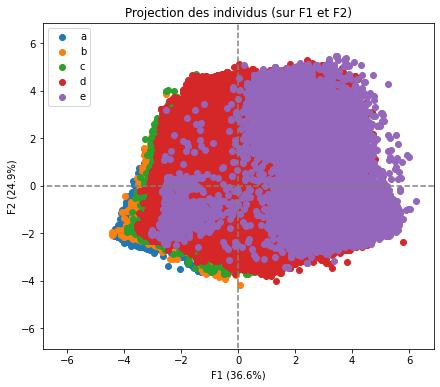

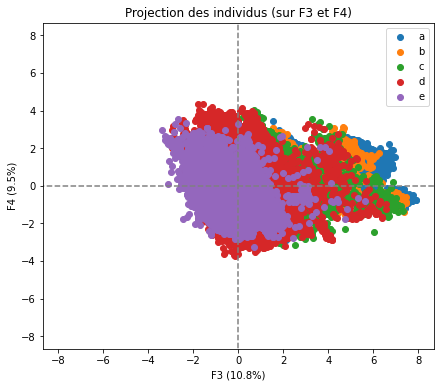

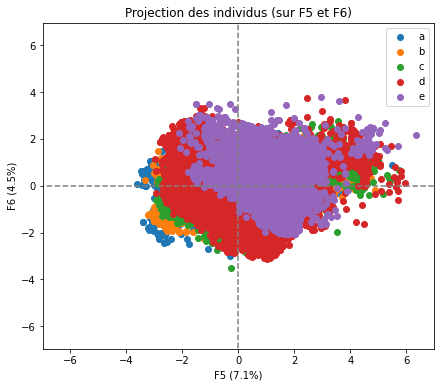

In [21]:
display_factorial_planes(x_project, 6, pca_four_cpt, [(0,1),(2,3),(4,5)], illustrative_var=nutri['nutriscore'])
plt.show()

<p style="color:#daae1f;font-size: 16px"> On peut contaster que le sucre et le gras sont en adéquation avec le cluster la note nutriscore e  </p>

In [92]:
note_a = nutri[nutri['nutriscore'] == "a"]

In [93]:
note_a = note_a.rename(columns={ 0: "F1", 1: "F2", 2:"F3",3:"F4",4:"F5",5:"F6"})
note_a

F1        F2        F3        F4        F5        F6 nutriscore
27     -2.275121 -0.821584  0.681042  0.287952 -1.260312 -0.694640          a
152    -2.611593 -0.425495  1.207562 -0.740929 -1.956482  0.174887          a
250    -3.298832 -0.659959  1.168384  0.032407  1.138302 -0.841436          a
251    -3.211378 -1.445793  1.576267 -0.425388  0.743028 -1.103131          a
252    -3.210094 -0.642807  1.180211 -0.048863  1.167029 -0.903525          a
...          ...       ...       ...       ...       ...       ...        ...
337664 -1.968361 -0.657687  1.706469  0.408619  0.452691 -0.108024          a
337788 -2.163131  0.005225  0.791507 -0.378575 -1.137770 -0.910207          a
337812 -3.560962 -0.776719 -0.164240 -0.408597 -0.335804 -1.152394          a
337845 -0.589385 -1.862880  0.807872  1.645356 -1.451788 -0.680706          a
338036 -3.127811 -1.822954  0.058257 -0.271897 -0.618009 -1.272374          a

[24050 rows x 7 columns]

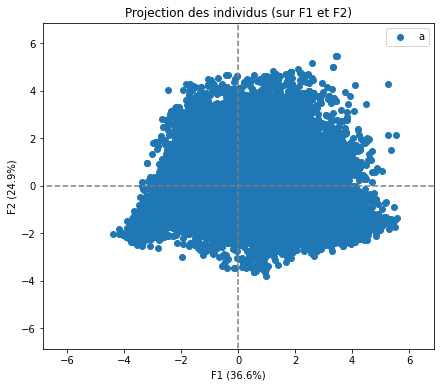

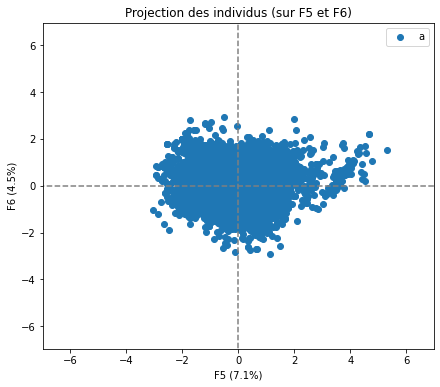

In [94]:
display_factorial_planes(x_project, 6, pca_four_cpt, [(0,1),(2,3),(4,5)], illustrative_var=note_a['nutriscore'])
plt.show()

<p style="color:#daae1f;font-size: 16px"> On peut contaster le vecteur protéine est centré sur les deux axes , tout comme la note nutriscore a  </p>